In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score,  recall_score, classification_report, confusion_matrix

       Average Wind Speed  Precipitation  Max. Temperature  Min. Temperature  \
count         2556.000000    2556.000000       2556.000000       2556.000000   
mean             7.735070       0.144139         81.053599         60.767214   
std              3.360468       0.554481         13.416024         14.005234   
min              0.000000       0.000000          0.000000          0.000000   
25%              5.370000       0.000000         73.000000         50.000000   
50%              7.160000       0.000000         83.000000         64.000000   
75%              9.840000       0.010000         91.000000         73.000000   
max             22.150000       8.040000        108.000000         81.000000   

       Fastest 2 minute wind speed  Fastest 5 second wind speed  Fog/Ice Fog  \
count                  2556.000000                  2556.000000  2556.000000   
mean                     18.457277                    23.664045     0.481612   
std                       5.350621     

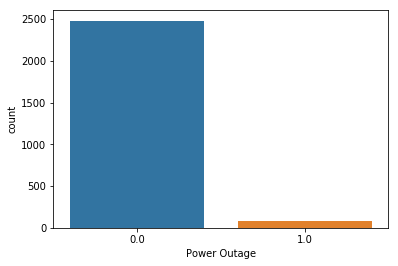

In [38]:
df = pd.read_csv('data.csv');
df = df.fillna(0);
df = df.drop(['DATE'], axis=1);
print(df.describe());
sns.countplot(x="Power Outage", data=df);
plt.show()

In [39]:
#Normalize all the data
from sklearn import preprocessing

scaledData = preprocessing.MinMaxScaler().fit_transform(df.values);
df = pd.DataFrame(scaledData, index = df.index, columns = df.columns);
df.describe()

,Average Wind Speed,Precipitation,Max. Temperature,Min. Temperature,Fastest 2 minute wind speed,Fastest 5 second wind speed,Fog/Ice Fog,Heavy Fog,Thunder,Hail,Glaze/Grime,Smoke/Haze,Power Outage
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,0.349213,0.017928,0.750496,0.750213,0.392708,0.387300,0.481612,0.070814,0.160798,0.000782,0.000391,0.093897,0.029734
std,0.151714,0.068965,0.124222,0.172904,0.113843,0.124538,0.499760,0.256564,0.367417,0.027967,0.019780,0.291742,0.169886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242438,0.000000,0.675926,0.617284,0.319149,0.310966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.323251,0.000000,0.768519,0.790123,0.385106,0.376432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444244,0.001244,0.842593,0.901235,0.465957,0.458265,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#Reduce the number of desired features
df['Avg Wind Speed Squared'] = pd.Series(np.square(df['Average Wind Speed']), index=df.index)
df['5 second wind speed squared'] = pd.Series(np.square(df['Fastest 5 second wind speed']));
df['2 min wind speed squared'] = pd.Series(np.square(df['Fastest 2 minute wind speed']));
df = df[['Power Outage', 'Precipitation', 'Avg Wind Speed Squared','2 min wind speed squared','5 second wind speed squared','Fog/Ice Fog', 'Heavy Fog', 'Thunder','Hail','Glaze/Grime', 'Smoke/Haze']];

In [41]:
#Split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['Power Outage'], test_size = 0.33, random_state = 99);
y_test.describe()

count    844.000000
mean       0.024882
std        0.155856
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Power Outage, dtype: float64

In [42]:
#Undersample the number of zeroes
import pandas_ml as pdml
df_ML = pdml.ModelFrame(X_train, target = y_train)
print("Before sampling ratio");
print(df_ML.target.value_counts());
#use ratio = 0.5 to change ratio
sampler = df_ML.imbalance.under_sampling.ClusterCentroids(ratio=0.1);
df_ML = df_ML.fit_sample(sampler);
print("Final counts after undersampling the zeroes");
print(df_ML.target.value_counts());
X_train = df_ML.iloc[:,1:];
y_train = df_ML['Power Outage'];
df_ML.head()

Before sampling ratio
0.0    1657
1.0      55
Name: Power Outage, dtype: int64


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Final counts after undersampling the zeroes
0.0    550
1.0     55
Name: Power Outage, dtype: int64


,Power Outage,Precipitation,Avg Wind Speed Squared,2 min wind speed squared,5 second wind speed squared,Fog/Ice Fog,Heavy Fog,Thunder,Hail,Glaze/Grime,Smoke/Haze
0,0.0,0.000000,0.079873,0.258583,0.259083,0.0,0.0,1.000000e+00,0.0,0.0,1.000000e+00
1,0.0,0.000000,0.124453,0.179271,0.150181,0.0,0.0,0.000000e+00,0.0,0.0,-1.387779e-17
2,0.0,0.001809,0.145894,0.133143,0.133282,1.0,0.0,-2.775558e-17,0.0,0.0,-2.775558e-17
3,0.0,0.008706,0.254763,0.217116,0.226832,1.0,0.0,1.000000e+00,0.0,0.0,0.000000e+00
4,0.0,0.000000,0.056259,0.117093,0.107918,1.0,1.0,0.000000e+00,0.0,0.0,-1.387779e-17


In [43]:
#Oversampling the number of ones
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=44, ratio=1);
X_train, y_train = sampler.fit_sample(X_train, y_train);
print(y_train);

[ 0.  0.  0. ...,  1.  1.  1.]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [44]:
#Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score = True, random_state = 123);
rf.fit(X_train, y_train);
print("Done");

Done


In [45]:
#Predict results
pred = rf.predict(X_test);

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred);

print("Accuracy: ", accuracy);

Accuracy:  0.777251184834


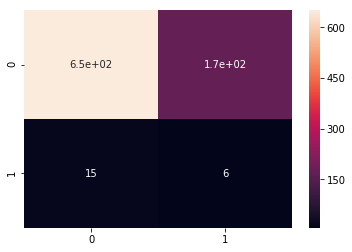

In [46]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot = True)
plt.show()

In [47]:
#Penalized SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=5.0);
clf.fit(X_train, y_train);
pred = clf.predict(X_test);
accuracy = accuracy_score(y_test, pred);
print("f1 score: ", f1_score(y_test, pred, average='macro'));
print(accuracy);

f1 score:  0.18968189705
0.21327014218


In [48]:
arr = list(y_train > 0);
test = [];
for i in arr:
    if (i==False):
        test.append(1);
    else:
        test.append(20);

f1 score:  0.202949595029
Accuracy:  0.233412322275
[ 0.16  0.15  0.3   0.31  0.    0.01  0.01  0.    0.    0.06]


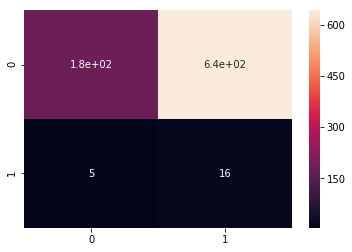

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=100);

clf.fit(X_train, y_train, sample_weight=test);
scores = cross_val_score(clf, X_train, y_train);
pred = clf.predict(X_test);


accuracy = accuracy_score(y_test, pred);
print("f1 score: ", f1_score(y_test, pred, average='macro'))
print("Accuracy: ", accuracy);
print(clf.feature_importances_)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));


               precision    recall  f1-score   support

  Normal Days       0.97      0.22      0.36       823
Power Outages       0.02      0.76      0.05        21

  avg / total       0.95      0.23      0.35       844



f1 score:  0.614925821423
0.46682464455


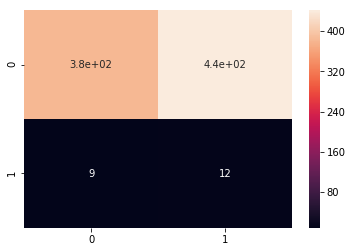

               precision    recall  f1-score   support

  Normal Days       0.98      0.46      0.63       823
Power Outages       0.03      0.57      0.05        21

  avg / total       0.95      0.47      0.61       844



In [51]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 200, random_state = 123);
clf.fit(X_train, y_train, sample_weight = test);
pred = clf.predict(X_test);
accuracy = accuracy_score(y_test, pred);
print("f1 score: ", f1_score(y_test, pred, average='weighted'))
print(accuracy);

from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot = True)
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));

Accuracy:  0.233412322275
[ 0.16  0.15  0.3   0.31  0.    0.01  0.01  0.    0.    0.06]


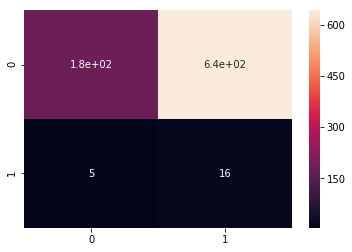

               precision    recall  f1-score   support

  Normal Days       0.97      0.22      0.36       823
Power Outages       0.02      0.76      0.05        21

  avg / total       0.95      0.23      0.35       844



In [52]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=100);

clf.fit(X_train, y_train, sample_weight=test);
scores = cross_val_score(clf, X_train, y_train);
pred = clf.predict(X_test);


accuracy = accuracy_score(y_test, pred);
print("Accuracy: ", accuracy);
print(clf.feature_importances_)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));


0.8236363636363635
Best parameters: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'n_estimators': 75}
Accuracy:  0.678909952607
[ 0.14532079  0.2035661   0.20869948  0.23573296  0.02300504  0.05794005
  0.03693766  0.00135941  0.00128713  0.08615138]


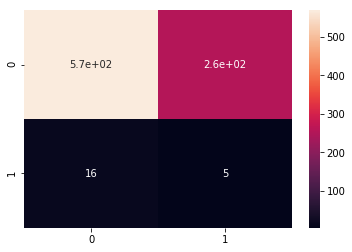

               precision    recall  f1-score   support

  Normal Days       0.97      0.69      0.81       823
Power Outages       0.02      0.24      0.04        21

  avg / total       0.95      0.68      0.79       844



In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50, 75 ,100, 150]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_search_ABC.fit(X_train, y_train);
print(grid_search_ABC.best_score_);
print('Best parameters: {}'.format(grid_search_ABC.best_params_));
clf = grid_search_ABC.best_estimator_;


clf.fit(X_train, y_train);
scores = cross_val_score(clf, X_train, y_train);
pred = clf.predict(X_test);


accuracy = accuracy_score(y_test, pred);
print("Accuracy: ", accuracy);
print(clf.feature_importances_)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));


0.464126598391


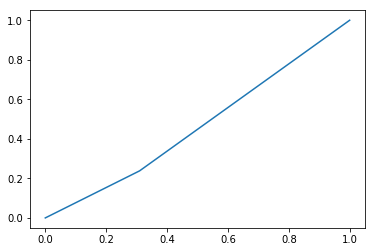

               precision    recall  f1-score   support

  Normal Days       0.97      0.69      0.81       823
Power Outages       0.02      0.24      0.04        21

  avg / total       0.95      0.68      0.79       844



In [54]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, pred));
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred);
roc_auc = auc(fpr, tpr);
plt.plot(fpr, tpr);
plt.show();
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));


Accuracy for cross validation run: 
f1 score:  0.421489400987
Accuracy: 0.87 (+/- 0.02) [Random Forest]
f1 score:  0.421489400987
Accuracy: 0.75 (+/- 0.03) [Gradient Boost]
f1 score:  0.421489400987
Accuracy: 0.82 (+/- 0.04) [Ensemble]
Accuracy for test data
Accuracy:  0.678909952607


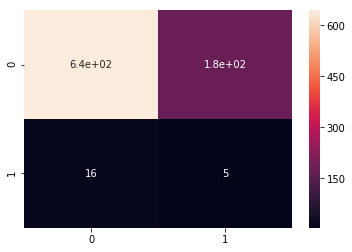

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
from sklearn.ensemble import VotingClassifier

clf4 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=12345)
clf5 = GradientBoostingClassifier(n_estimators = 200, learning_rate=1, max_depth=1, random_state=123)

eclf = VotingClassifier(estimators=[ ('rforest', clf4), ('gboost', clf5)], voting = 'hard');

print("Accuracy for cross validation run: ");
for clf, label in zip([clf4, clf5, eclf], ['Random Forest', 'Gradient Boost', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro');
    print("f1 score: ", f1_score(y_test, pred, average='macro'))
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), label));
eclf = eclf.fit(X_train,y_train, sample_weight = test);
from sklearn.metrics import confusion_matrix
pred = eclf.predict(X_test);
cm = pd.DataFrame(confusion_matrix(y_test, pred));
print("Accuracy for test data");
sns.heatmap(cm, annot=True);
print("Accuracy: ", accuracy);
plt.show();

Done
Accuracy:  0.763033175355
f1 score:  0.844396995343


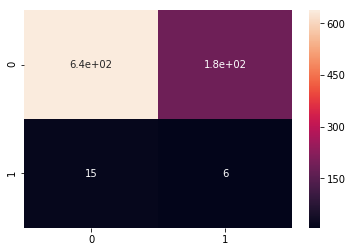

In [56]:
#Train a weighted random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score = True, random_state = 123);
rf.fit(X_train, y_train, sample_weight = test);
print("Done");
pred = rf.predict(X_test);
accuracy = accuracy_score(y_test, pred);

print("Accuracy: ", accuracy);
print("f1 score: ", f1_score(y_test, pred, average='weighted'));
cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot = True)
plt.show()

Optimal K value is :  1
Misclassification error at that value is  0.158181818182


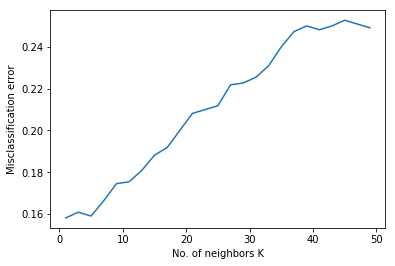

In [57]:
#Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
checkKValue = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 !=0, checkKValue))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1-x for x in cv_scores]
optimalK = neighbors[MSE.index(min(MSE))]
print("Optimal K value is : ", optimalK);
print("Misclassification error at that value is ", min(MSE));
plt.plot(neighbors, MSE)
plt.xlabel('No. of neighbors K')
plt.ylabel('Misclassification error')
plt.show()

Accuracy:  0.781990521327


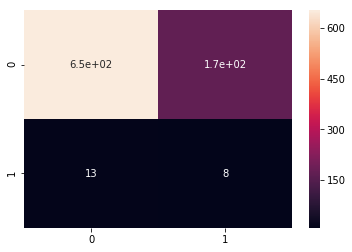

               precision    recall  f1-score   support

  Normal Days       0.98      0.79      0.88       823
Power Outages       0.04      0.38      0.08        21

  avg / total       0.96      0.78      0.86       844



In [58]:
knn = KNeighborsClassifier(n_neighbors=optimalK);
knn.fit(X_train, y_train);
pred = knn.predict(X_test);
accuracy = accuracy_score(y_test, pred);
print("Accuracy: ", accuracy);
# from sklearn.metrics import confusion_matrix
# con_mat = confusion_matrix(y_test, pred, [0, 1])
# print(con_mat)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));
